# VAE Deep learning to estimate mobility for organic molecules*

#### Load, view, and preprocess dataset
- Load mobility dataset containing many organic molecules and their associated mobility
- Pre-process data and split to test/train sets
[QM9](http://moleculenet.ai/datasets-1)
QM9 (structure): Geometric,  energetic, electronic and thermodynamic properties of DFT-modelled small molecules dataset to train our models. 
The QM9 dataset contains the mobility of various small organic molecules.
We'll also preprocess the dataset and create train/test splits for the Convolutional Neural Network (CNN) and Variational AutoEncoder (VAE) models.
QM9 is a comprehensive dataset that provides geometric, energetic, electronic and thermodynamic properties for a subset of GDB-17 database, comprising 134 thousand stable organic molecules with up to 9 heavy atoms.  All molecules are modeled using density functional theory (B3LYP/6-31G(2df,p) based DFT).

    - "mol_id" - Molecule ID (gdb9 index) mapping to the .sdf file
    - "A" - Rotational constant (unit: GHz)
    - "B" - Rotational constant (unit: GHz)
    - "C" - Rotational constant (unit: GHz)
    - "mu" - Dipole moment (unit: D)
    - "alpha" - Isotropic polarizability (unit: Bohr^3)
    - "homo" - Highest occupied molecular orbital energy (unit: Hartree)
    - "lumo" - Lowest unoccupied molecular orbital energy (unit: Hartree)
    - "gap" - Gap between HOMO and LUMO (unit: Hartree)
    - "r2" - Electronic spatial extent (unit: Bohr^2)
    - "zpve" - Zero point vibrational energy (unit: Hartree)
    - "u0" - Internal energy at 0K (unit: Hartree)
    - "u298" - Internal energy at 298.15K (unit: Hartree)
    - "h298" - Enthalpy at 298.15K (unit: Hartree)
    - "g298" - Free energy at 298.15K (unit: Hartree)
    - "cv" - Heat capavity at 298.15K (unit: cal/(mol*K))
    - "u0_atom" - Atomization energy at 0K (unit: kcal/mol)
    - "u298_atom" - Atomization energy at 298.15K (unit: kcal/mol)
    - "h298_atom" - Atomization enthalpy at 298.15K (unit: kcal/mol)
    - "g298_atom" - Atomization free energy at 298.15K (unit: kcal/mol)
  "u0_atom" ~ "g298_atom" (used in MoleculeNet) are calculated from the
  differences between "u0" ~ "g298" and sum of reference energies of all
  atoms in the molecules, as given in
 [here](https://figshare.com/articles/Atomref%3A_Reference_thermochemical_energies_of_H%2C_C%2C_N%2C_O%2C_F_atoms./1057643).
 [here](https://github.com/deepchem/deepchem/blob/master/deepchem/molnet/load_function/qm9_datasets.py)


we will plot a histogram of SMILES string lengths from dataset. These lengths will be used to determine the length of the inputs for our CNN and VAE models. 
Below are examples of the SMILES representation: 
1. Methane: 'C'
2. Pentane: 'CCCCC'
3. Methanol and Ethanol: 'CO' and 'CCO'
4. Pyridine: 'C1:C:C:N:C:C:1'

To learn more about the SMILES representation, click [here](https://chem.libretexts.org/Courses/University_of_Arkansas_Little_Rock/ChemInformatics_(2017)%3A_Chem_4399%2F%2F5399/2.3%3A_Chemical_Representations_on_Computer%3A_Part_III).

#### Data preparation

First, we'll get the unique character set from all SMILES strings in the dataset. 
Then we will use the unique character set to convert our SMILES strings to a one-hot representation, which is a representation that converts raw strings of text to numerical inputs for our models.

In a one-hot representation, each character of our SMILES string is encoded as a vector of zeros, except for one non-zero value. For instance, the character 'C' in the SMILES string is converted to a vector of length 31, consisting of 30 zeros and one non-zero entry of one. The length of this vector (31 in our case) is the total number of unique characters in the dataset.

Given a string of 5 characters (say Pentane, which is represented as 'CCCCC'), we would thus get 5 vectors each of length 31. Since different molecules have different SMILES string lengths, we can pre-define the length of each string to be the maximum length from the database, with smaller molecules represented with additional characters. In our case, this maximum length is 40 and we represent the extra characters for smaller molecules with pre-defined one-hot vectors. This means that each molecule is now represented as a set of 40 vectors, each of length 31. We can represent this as a 40x31 matrix.

One-hot encoding is commonly used in natural language processing, and you can learn more about one-hot encoding [here](https://en.wikipedia.org/wiki/One-hot). 

Let's briefly visualize what our input data looks like using a heatmap that shows the position of each character in the SMILES string, you can change the index to see various molecules. Each molecule is represented by a 40x31 sparse matrix, the bright spots in the heatmap indicate the position at which a one is found in the matrix. For instance, the first row has a bright spot at index 18, indicating that the first character is 'C'. The second row has a bright spot at index 23, which indicates that the second character is 'O'. For the compound Dimethoxymethane with a SMILES string 'COCOC', we expect the matrix to have alternating bright spots at index 18 and index 23 for the first five rows. Beyond that, the rows all have a bright spot at index 1, which stands for the extra characters padded on to our string to make all SMILES strings the same length. The heatmap below is plotted using the [Seaborn](https://seaborn.pydata.org/) library.

Finally, we will define our input and output and create test/train splits in the dataset.

#### Train a Convolutional neural network (CNN) 
- Train a CNN to predict Mobility
- Predict mobility from any given SMILES representation of a molecule 

#### Train a Variational autoencoder (VAE)
- Train a VAE to take an encoded SMILES as input and learn a mapping from encoded SMILES to latent space and back to the input
- Use a portion of the VAE to generate SMILES by sampling from a unit gaussian

[Keras](https://keras.io/) 
[Tensorflow](https://www.tensorflow.org/)
[Pandas](https://pandas.pydata.org/) 
[Numpy](https://numpy.org/)

In [201]:
#!conda env list
#!conda update -n base conda 
#!conda create -n py37 python=3.7
#!conda create -n yaml24 yaml=0.2.4 -c conda-forge -y
#!conda info --envs
#!conda remove -n <envs_name> --all
#!source debian10/anaconda/anaconda-7/bin/activate
#!python -V
#!conda activate py37
#!python -V
#!conda deactivate 
#!python -V
#!python -m pip install --user <pacakge>
#!pip3 show <pacakge>
#!pip3 list
#!pip3 install pipreqs
#!pipreqs .
#!
#!
!python -m pip install --user pymatgen
#!python -m pip install --user mendeleev
#!python -m pip install --user keras_sequential_ascii
#!python -m pip install --user -U kaleido
#!python -m pip install --user plotly
#!conda install -c plotly plotly-orca
# import sys
#print(sys.path)
#!python -m pip install --user <pacakge>
#!python -m pip install --user  python-utils 
#!conda install -c conda-forge python-utils -y
#conda install -c conda-forge/label/gcc7 python-utils
#!python -m pip install --user livelossplot

#from google.colab import drive
#drive.mount('/content/gdrive')
#!ls gdrive/MyDrive/'Colab Notebooks'/data/qm9.csv
#!ls /home/nanohub/bbishnoi/data/results/vae/qm9.csv 
#!ls /home/nanohub/bbishnoi/data/results/1909584/citrinednn/bin/utils.py
#!python -m pip install --user numpy scipy matplotlib ipython jupyter pandas sympy nose
!ls /apps/citrinednn/r15/bin/utils.py

/apps/citrinednn/r15/bin/utils.py


import os, stat
from IPython.display import clear_output

try:
    user = str(input())
    clear_output()
    if user == None:
        raise TypeError('Empty')
    with open(os.path.expanduser('~/.wolframkey.txt'), 'w') as keyfile:
        keyfile.write(user)
    os.chmod(os.path.expanduser('~/.wolframkey.txt'), stat.S_IREAD | stat.S_IWRITE)
    del user
    print("Success")
except:
    print("Something seems wrong with your key")

In [202]:
import os, stat
from IPython.display import clear_output

try:
    user = str(input())
    clear_output()
    if user == None:
        raise TypeError('Empty')
    with open(os.path.expanduser('~/.citrinekey.txt'), 'w') as keyfile:
        keyfile.write(user)
    os.chmod(os.path.expanduser('~/.citrinekey.txt'), stat.S_IREAD | stat.S_IWRITE)
    del user
    print("Success")
except:
    print("Something seems wrong with your key")

Success


In [204]:
# These lines import both libraries and then define an array with elements to be used below

#Citrination
from citrination_client import *
from matminer.data_retrieval.retrieve_Citrine import CitrineDataRetrieval
#Wolframalpha
import wolframalpha

#Misc. Tools
import matplotlib.pyplot as plt
import pandas as pd

#Import WolframAlpha API Key
file = open(os.path.expanduser('~/.wolframkey.txt'),"r+")
apikey_wolfram = file.readline()
file.close()

#Import Citrine API Key
file = open(os.path.expanduser('~/.citrinekey.txt'),"r+")
apikey_citrine = file.readline()
file.close()

ModuleNotFoundError: No module named 'citrination_client'

In [208]:
import os, stat
from IPython.display import clear_output

try:
    user = str(input())
    clear_output()
    if not user.isalnum():
        raise TypeError('Wrong Key')
    if user == None:
        raise TypeError('Empty')
    with open(os.path.expanduser('~/.mpkey.txt'), 'w') as keyfile:
        keyfile.write(user)
    os.chmod(os.path.expanduser('~/.mpkey.txt'), stat.S_IREAD | stat.S_IWRITE)
    del user
    print("Success")
except:
    print("Something seems wrong with your key")

Success


In [217]:
# These lines import both libraries and then define an array with elements to be used below

#Pymatgen and sub-libraries

#import pymatgen as pymat
#import mendeleev as mendel
import pymatgen
#from pymatgen import MPRester, Composition, Element, Structure
from pymatgen.ext.matproj import MPRester, Composition, Element, Structure

#Misc. Tools
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#Import API Key
file = open(os.path.expanduser('~/.mpkey.txt'),"r+")
apikey = file.readline()
file.close()
rester = MPRester(apikey)

In [272]:
# These lines import both libraries and then define an array with elements to be used below

#Pymatgen and sub-libraries
import pymatgen
from pymatgen.ext.matproj import MPRester, Composition, Element, Structure
from pymatgen.io.vasp import Vasprun
from pymatgen.entries.computed_entries import ComputedEntry
from pymatgen.entries.compatibility import MaterialsProjectCompatibility
from pymatgen.util.plotting import *
from pymatgen.analysis.phase_diagram import *
#import pymatgen.core.composition
from pymatgen.apps.borg.hive import VaspToComputedEntryDrone
from pymatgen.entries.compatibility import MaterialsProjectCompatibility
import json

#Misc. Tools
import matplotlib.pyplot as plt
import random
import os
from itertools import combinations

#Import API Key
file = open(os.path.expanduser('~/.mpkey.txt'),"r+")
apikey = file.readline()
file.close()
#Define MP API rester key
rester = MPRester(apikey)

In [218]:
data = rester.query({"elements": "O", "nelements": {"$gte": 2}},
                    ["task_id","pretty_formula","formula","volume","density","elements",
                     "e_above_hull","elasticity","unit_cell_formula"])

  0%|          | 0/69532 [00:00<?, ?it/s]

In [ ]:
rester.query('mp-230',['pretty_formula','band_gap','final_structure'])

In [219]:
print('Number of oxide structures available on the MP database: %s' % len(data))
print('Example output: %s' % data[0])

Number of oxide structures available on the MP database: 69532
Example output: {'task_id': 'mp-1008785', 'pretty_formula': 'RuO2', 'formula': {'Ru': 1.0, 'O': 2.0}, 'volume': 28.647745973939394, 'density': 7.713205120800527, 'elements': ['Ru', 'O'], 'e_above_hull': 0.18805830166666748, 'elasticity': {'G_Reuss': 183.0, 'G_VRH': 184.0, 'G_Voigt': 186.0, 'G_Voigt_Reuss_Hill': 184.0, 'K_Reuss': 281.0, 'K_VRH': 281.0, 'K_Voigt': 281.0, 'K_Voigt_Reuss_Hill': 281.0, 'elastic_anisotropy': 0.1, 'elastic_tensor': [[573.0, 136.0, 136.0, 0.0, 0.0, 0.0], [136.0, 573.0, 136.0, 0.0, 0.0, 0.0], [136.0, 136.0, 573.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 165.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 165.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 165.0]], 'homogeneous_poisson': 0.23, 'poisson_ratio': 0.23, 'universal_anisotropy': 0.1, 'elastic_tensor_original': [[573.025031132464, 135.55125038178963, 135.55125038178963, 0.0, 0.0, 0.0], [135.57119913962916, 573.0474134996017, 135.57119913962916, 0.0, 0.0, 0.0], [135.56410576

In [220]:
df_oxide = pd.DataFrame.from_dict(data)
display(df_oxide)

,task_id,pretty_formula,formula,volume,density,elements,e_above_hull,elasticity,unit_cell_formula
0,mp-1008785,RuO2,"{'Ru': 1.0, 'O': 2.0}",28.647746,7.713205,"[Ru, O]",0.188058,"{'G_Reuss': 183.0, 'G_VRH': 184.0, 'G_Voigt': ...","{'Ru': 1.0, 'O': 2.0}"
1,mp-1019593,Ce(PO3)4,"{'Ce': 1.0, 'P': 4.0, 'O': 12.0}",1932.672582,3.134363,"[Ce, O, P]",0.000000,None,"{'Ce': 8.0, 'P': 32.0, 'O': 96.0}"
2,mp-1019787,K2NaZn(BO2)5,"{'K': 2.0, 'Na': 1.0, 'Zn': 1.0, 'B': 5.0, 'O'...",1021.922072,2.474063,"[B, K, Na, O, Zn]",0.000000,None,"{'K': 8.0, 'Na': 4.0, 'Zn': 4.0, 'B': 20.0, 'O..."
3,mp-1020626,Zr2Ga(PO4)3,"{'Zr': 2.0, 'Ga': 1.0, 'P': 3.0, 'O': 12.0}",549.658421,3.245109,"[Ga, O, P, Zr]",0.010919,None,"{'Zr': 4.0, 'Ga': 2.0, 'P': 6.0, 'O': 24.0}"
4,mp-1030964,KMg6CO8,"{'K': 1.0, 'Mg': 6.0, 'C': 1.0, 'O': 8.0}",181.999128,2.964662,"[C, K, Mg, O]",0.683313,None,"{'K': 1.0, 'Mg': 6.0, 'C': 1.0, 'O': 8.0}"
...,...,...,...,...,...,...,...,...,...
69527,mvc-2438,MgCuO2,"{'Mg': 1.0, 'Cu': 1.0, 'O': 2.0}",187.045526,4.255975,"[Cu, Mg, O]",0.173693,None,"{'Mg': 4.0, 'Cu': 4.0, 'O': 8.0}"
69528,mvc-2470,Mg2Fe9O13,"{'Mg': 2.0, 'Fe': 9.0, 'O': 13.0}",255.922828,4.926068,"[Fe, Mg, O]",0.091346,None,"{'Mg': 2.0, 'Fe': 9.0, 'O': 13.0}"
69529,mvc-4429,CaBi2O5,"{'Ca': 1.0, 'Bi': 2.0, 'O': 5.0}",291.621343,6.127326,"[Bi, Ca, O]",0.195755,None,"{'Ca': 2.0, 'Bi': 4.0, 'O': 10.0}"
69530,mvc-7986,MoAs2O7,"{'Mo': 1.0, 'As': 2.0, 'O': 7.0}",720.449156,3.298531,"[As, Mo, O]",0.013690,None,"{'Mo': 4.0, 'As': 8.0, 'O': 28.0}"


In [221]:
energy_cutoff_value = 1 #energy above convex hull cutoff [meV]
df_oxide = df_oxide[df_oxide['e_above_hull'] <= (energy_cutoff_value/1000)]  

In [222]:
display(df_oxide)

,task_id,pretty_formula,formula,volume,density,elements,e_above_hull,elasticity,unit_cell_formula
1,mp-1019593,Ce(PO3)4,"{'Ce': 1.0, 'P': 4.0, 'O': 12.0}",1932.672582,3.134363,"[Ce, O, P]",0.0,None,"{'Ce': 8.0, 'P': 32.0, 'O': 96.0}"
2,mp-1019787,K2NaZn(BO2)5,"{'K': 2.0, 'Na': 1.0, 'Zn': 1.0, 'B': 5.0, 'O'...",1021.922072,2.474063,"[B, K, Na, O, Zn]",0.0,None,"{'K': 8.0, 'Na': 4.0, 'Zn': 4.0, 'B': 20.0, 'O..."
14,mp-10448,Tl2TeMo2(PO7)2,"{'Tl': 2.0, 'Te': 1.0, 'Mo': 2.0, 'P': 2.0, 'O...",1343.803586,5.012920,"[Mo, O, P, Te, Tl]",0.0,None,"{'Tl': 8.0, 'Te': 4.0, 'Mo': 8.0, 'P': 8.0, 'O..."
22,mp-1078659,CaRhO3,"{'Ca': 1.0, 'Rh': 1.0, 'O': 3.0}",115.778037,5.478286,"[Ca, O, Rh]",0.0,None,"{'Ca': 2.0, 'Rh': 2.0, 'O': 6.0}"
24,mp-1080460,Mo(BrO)2,"{'Mo': 1.0, 'Br': 2.0, 'O': 2.0}",243.408363,3.926034,"[Br, Mo, O]",0.0,None,"{'Mo': 2.0, 'Br': 4.0, 'O': 4.0}"
...,...,...,...,...,...,...,...,...,...
69461,mp-8187,K2ZnO2,"{'K': 2.0, 'Zn': 1.0, 'O': 2.0}",176.468814,3.304810,"[K, Zn, O]",0.0,"{'G_Reuss': 9.0, 'G_VRH': 11.0, 'G_Voigt': 14....","{'K': 4.0, 'Zn': 2.0, 'O': 4.0}"
69468,mp-8796,Sr2LiSc(B2O5)2,"{'Sr': 2.0, 'Li': 1.0, 'Sc': 1.0, 'B': 4.0, 'O...",831.033008,3.439836,"[B, Li, O, Sc, Sr]",0.0,None,"{'Sr': 8.0, 'Li': 4.0, 'Sc': 4.0, 'B': 16.0, '..."
69512,mp-774432,K2Li3NiO4,"{'K': 2.0, 'Li': 3.0, 'Ni': 1.0, 'O': 4.0}",497.716166,2.958788,"[K, Li, Ni, O]",0.0,None,"{'K': 8.0, 'Li': 12.0, 'Ni': 4.0, 'O': 16.0}"
69521,mp-849384,Li11V8(PO4)12,"{'Li': 11.0, 'V': 8.0, 'P': 12.0, 'O': 48.0}",938.691135,2.872031,"[Li, O, P, V]",0.0,None,"{'Li': 11.0, 'V': 8.0, 'P': 12.0, 'O': 48.0}"


In [133]:
import numpy as np
print(np.__version__)

!pip install -U numpy==1.19.5

1.20.2
Defaulting to user installation because normal site-packages is not writeable


In [134]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [135]:
%load_ext tensorboard
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."
import tensorboard
tensorboard.__version__
!rm -rf ./logs/ 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
TensorFlow version:  2.2.0
rm: cannot remove './logs/fit/20211015-065521/train/.nfs0000000481de7270000010b3': Device or resource busy
rm: cannot remove './logs/fit/20211015-065521/validation/.nfs00000001917afad2000010b4': Device or resource busy


In [230]:
# general imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
#import pymatgen as pymat
#import mendeleev as mendel

# keras imports
from keras.layers import (Input, Dense, Conv1D, MaxPool1D, Dropout, GRU, LSTM, TimeDistributed, Add, Flatten, RepeatVector, Lambda, Concatenate)
from keras.models import Model, load_model
from keras.metrics import binary_crossentropy
from keras import initializers
import keras.backend as K

# Visualization
from keras_sequential_ascii import keras2ascii

# from utils import label_map_util
# from utils import visualization_utils as vis_util

#from object_detection.utils import label_map_util
#from object_detection.utils import visualization_utils as vis_util

# utils functions
from python_utils import *
#from utils import *

# Hacky MacOS fix for Tensorflow runtimes... (You won't need this unless you are on MacOS)
# This fixes a display bug with progress bars that can pop up on MacOS sometimes.
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Remove warnings from output
import warnings
warnings.filterwarnings('ignore')

In [287]:
#!ls /home/nanohub/bbishnoi/data/results/vae/qm9.csv
#dataset = pd.read_csv("/home/nanohub/bbishnoi/data/results/vae/qm9.csv")
# read dataset as a dataframe
#dataset = pd.read_csv("../data/ESOL_delaney-processed.csv")
dataset = pd.read_csv("./qm9.csv")
#dataset = pd.read_csv("gdrive/MyDrive/Colab Notebooks/data/qm9.csv")


# print column names in dataset
print(f"Columns in dataset: {list(dataset.columns)}")

# print number of rows in dataset
print(f"\nLength of dataset: {len(dataset)}")

# shuffle rows of the dataset (we could do this later as well when doing train/test splits)
dataset = dataset.sample(frac=1, random_state=0)

# show first 5 rows of dataframe
dataset.head()
#dataset.head(20)

Columns in dataset: ['mol_id', 'smiles', 'A', 'B', 'C', 'mu', 'alpha', 'homo', 'lumo', 'gap', 'r2', 'zpve', 'u0', 'u298', 'h298', 'g298', 'cv', 'u0_atom', 'u298_atom', 'h298_atom', 'g298_atom']

Length of dataset: 133885


,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
43225,gdb_43226,O=C1C2CCCC1C=C2,2.19575,1.83375,1.78978,2.8898,78.73,-0.2330,-0.0029,0.2301,...,0.162755,-385.930699,-385.923667,-385.922723,-385.961801,29.000,-1938.509588,-1950.984467,-1961.653375,-1808.771475
18949,gdb_18950,O=CC1C2C3CC2N13,5.76254,1.67862,1.56959,2.2243,65.83,-0.2456,-0.0355,0.2101,...,0.118824,-362.561835,-362.555470,-362.554526,-362.592646,24.065,-1462.630608,-1471.968569,-1480.266121,-1361.585343
65056,gdb_65057,CC1(CO1)C1(CO1)C#C,2.33460,1.50396,1.24794,2.5230,73.97,-0.2620,0.0181,0.2801,...,0.132144,-421.745993,-421.736936,-421.735992,-421.779716,33.773,-1686.271678,-1695.698118,-1705.181034,-1571.293204
27392,gdb_27393,c1c([nH]c(nc1=O)N)O,2.01530,1.87826,0.97339,7.1395,67.95,-0.2213,0.0039,0.2252,...,0.102825,-470.075554,-470.067765,-470.066821,-470.107671,29.926,-1447.261657,-1454.816238,-1462.520166,-1350.407526
51740,gdb_51741,O=COC1CCC11CN1,2.95255,1.08628,0.88017,2.6332,74.49,-0.2540,0.0016,0.2555,...,0.147164,-439.065902,-439.057354,-439.056409,-439.100076,31.201,-1738.070663,-1748.704431,-1758.779715,-1616.381608


In [286]:
rester.query('',['smiles','alpha','gap'])

MPRestError: Query should not be or. Content: b'{"valid_response": false, "error": "Query should not be or", "version": {"db": "2021_05_13", "pymatgen": "2022.0.8", "rest": "2.0"}, "created_at": "2021-10-15T05:28:59.124768", "traceback": "Traceback (most recent call last):\\n  File \\"/var/www/python/matgen_prod/materials_django/rest/rest.py\\", line 211, in query\\n    queryresults = qe.query(criteria=criteria, properties=properties)\\n  File \\"/var/www/python/matgen_prod/materials_django/db/query_engine.py\\", line 191, in query\\n    return super(SandboxQueryEngine, self).query(\\n  File \\"/opt/miniconda3/envs/mpprod3/lib/python3.8/site-packages/matgendb/query_engine.py\\", line 409, in query\\n    func(crit, props)\\n  File \\"/var/www/python/matgen_prod/materials_django/db/query_engine.py\\", line 288, in __call__\\n    crit = self._extract_sandbox_bits(query)\\n  File \\"/var/www/python/matgen_prod/materials_django/db/query_engine.py\\", line 312, in _extract_sandbox_bits\\n    assert False, \\"Query should not be or\\"\\nAssertionError: Query should not be or\\n\\nDuring handling of the above exception, another exception occurred:\\n\\nTraceback (most recent call last):\\n  File \\"/var/www/python/matgen_prod/materials_django/rest/rest.py\\", line 95, in wrapped\\n    d = func(*args, **kwargs)\\n  File \\"/var/www/python/matgen_prod/materials_django/rest/rest.py\\", line 239, in query\\n    raise RESTError(str(ex))\\nrest.rest.RESTError: Query should not be or\\n"}'

In [255]:
dataset_1 = dataset.rename(columns={"mol_id": "Mol_ID", "smiles": "SMILES","A":"A","B":"B","C":"C","mu":"Mu","alpha":"Alpha","homo":"HOMO", "lumo":"LUMO","gap":"E. Gap","r2":"R2",
                     "zpve":"ZPVE","u0":"U0","u298":"U298","h298":"H298","g298":"G298","cv":"CV","u0_atom":"U0_atom","u298_atom":"U298_atom", "h298_atom":"H298_atom", "g298_atom":"G298_atom"})
display(dataset_1)
# "alpha" - Isotropic polarizability (unit: Bohr^3) [Bohr$^3$]
# "gap" - Gap between HOMO and LUMO (unit: Hartree)
#"mol_id" - Molecule ID (gdb9 index) mapping to the .sdf file
#"A" - Rotational constant (unit: GHz)
#"B" - Rotational constant (unit: GHz)
#"C" - Rotational constant (unit: GHz)
#"mu" - Dipole moment (unit: D)
#"alpha" - Isotropic polarizability (unit: Bohr^3)
#"homo" - Highest occupied molecular orbital energy (unit: Hartree)
#"lumo" - Lowest unoccupied molecular orbital energy (unit: Hartree)
#"gap" - Gap between HOMO and LUMO (unit: Hartree)
#"r2" - Electronic spatial extent (unit: Bohr^2)
#"zpve" - Zero point vibrational energy (unit: Hartree)
#"u0" - Internal energy at 0K (unit: Hartree)
#"u298" - Internal energy at 298.15K (unit: Hartree)
#"h298" - Enthalpy at 298.15K (unit: Hartree)
#"g298" - Free energy at 298.15K (unit: Hartree)
#"cv" - Heat capavity at 298.15K (unit: cal/(mol*K))
#"u0_atom" - Atomization energy at 0K (unit: kcal/mol)
#"u298_atom" - Atomization energy at 298.15K (unit: kcal/mol)
#"h298_atom" - Atomization enthalpy at 298.15K (unit: kcal/mol)


,Mol_ID,SMILES,A,B,C,Mu,Alpha,HOMO,LUMO,E. Gap,...,ZPVE,U0,U298,H298,G298,CV,U0_atom,U298_atom,H298_atom,G298_atom
43225,gdb_43226,O=C1C2CCCC1C=C2,2.19575,1.83375,1.78978,2.8898,78.73,-0.2330,-0.0029,0.2301,...,0.162755,-385.930699,-385.923667,-385.922723,-385.961801,29.000,-1938.509588,-1950.984467,-1961.653375,-1808.771475
18949,gdb_18950,O=CC1C2C3CC2N13,5.76254,1.67862,1.56959,2.2243,65.83,-0.2456,-0.0355,0.2101,...,0.118824,-362.561835,-362.555470,-362.554526,-362.592646,24.065,-1462.630608,-1471.968569,-1480.266121,-1361.585343
65056,gdb_65057,CC1(CO1)C1(CO1)C#C,2.33460,1.50396,1.24794,2.5230,73.97,-0.2620,0.0181,0.2801,...,0.132144,-421.745993,-421.736936,-421.735992,-421.779716,33.773,-1686.271678,-1695.698118,-1705.181034,-1571.293204
27392,gdb_27393,c1c([nH]c(nc1=O)N)O,2.01530,1.87826,0.97339,7.1395,67.95,-0.2213,0.0039,0.2252,...,0.102825,-470.075554,-470.067765,-470.066821,-470.107671,29.926,-1447.261657,-1454.816238,-1462.520166,-1350.407526
51740,gdb_51741,O=COC1CCC11CN1,2.95255,1.08628,0.88017,2.6332,74.49,-0.2540,0.0016,0.2555,...,0.147164,-439.065902,-439.057354,-439.056409,-439.100076,31.201,-1738.070663,-1748.704431,-1758.779715,-1616.381608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,gdb_41994,C1CC2NCCN=C2O1,3.31362,1.52002,1.10654,3.9253,77.26,-0.2273,0.0299,0.2571,...,0.163934,-419.223780,-419.216601,-419.215656,-419.255298,28.666,-1824.869591,-1837.250971,-1847.919251,-1694.776307
97639,gdb_97640,CNC(C=O)C#CCO,3.16977,0.69866,0.61431,1.4055,79.32,-0.2296,-0.0356,0.1939,...,0.144390,-439.035598,-439.024756,-439.023812,-439.073858,36.252,-1719.054630,-1728.248892,-1738.324804,-1599.929577
95939,gdb_95940,CC1CCCC1(C)C=O,1.96143,1.50843,1.18118,2.6202,85.17,-0.2449,-0.0156,0.2293,...,0.205254,-388.325715,-388.316013,-388.315069,-388.360743,36.745,-2185.700443,-2200.054084,-2213.094976,-2031.684007
117952,gdb_117953,CCOC(C)C(=O)OC,2.06763,1.12825,0.80717,2.4356,77.12,-0.2479,0.0066,0.2545,...,0.178938,-461.391550,-461.380366,-461.379422,-461.429278,38.097,-1954.003413,-1965.648725,-1977.503625,-1814.540165


In [235]:
dataset = rester.query({"elements": "O", "nelements": {"$gte": 3}},
                    ["task_id","mol_id","smiles","A","B","C","mu","alpha","lumo","gap","r2",
                     "zpve","u0","u298","h298","g298","cv","u0_atom","u298_atom", "h298_atom", "g298_atom"])

  0%|          | 0/67086 [00:00<?, ?it/s]

In [256]:
print('Number of oxide structures available on the MP database: %s' % len(data))
print('Example output: %s' % data[0])

Number of oxide structures available on the MP database: 69552
Example output: {'task_id': 'mp-1008785', 'mol_id': None, 'smiles': None, 'A': None, 'B': None, 'C': None, 'mu': None, 'alpha': None, 'lumo': None, 'gap': None, 'r2': None, 'zpve': None, 'u0': None, 'u298': None, 'h298': None, 'g298': None, 'cv': None, 'u0_atom': None, 'u298_atom': None, 'h298_atom': None, 'g298_atom': None}


In [257]:
df_1 = pd.DataFrame.from_dict(dataset)
display(df_1)

,Mol_ID,SMILES,A,B,C,Mu,Alpha,HOMO,LUMO,E. Gap,...,ZPVE,U0,U298,H298,G298,CV,U0_atom,U298_atom,H298_atom,G298_atom
43225,gdb_43226,O=C1C2CCCC1C=C2,2.19575,1.83375,1.78978,2.8898,78.73,-0.2330,-0.0029,0.2301,...,0.162755,-385.930699,-385.923667,-385.922723,-385.961801,29.000,-1938.509588,-1950.984467,-1961.653375,-1808.771475
18949,gdb_18950,O=CC1C2C3CC2N13,5.76254,1.67862,1.56959,2.2243,65.83,-0.2456,-0.0355,0.2101,...,0.118824,-362.561835,-362.555470,-362.554526,-362.592646,24.065,-1462.630608,-1471.968569,-1480.266121,-1361.585343
65056,gdb_65057,CC1(CO1)C1(CO1)C#C,2.33460,1.50396,1.24794,2.5230,73.97,-0.2620,0.0181,0.2801,...,0.132144,-421.745993,-421.736936,-421.735992,-421.779716,33.773,-1686.271678,-1695.698118,-1705.181034,-1571.293204
27392,gdb_27393,c1c([nH]c(nc1=O)N)O,2.01530,1.87826,0.97339,7.1395,67.95,-0.2213,0.0039,0.2252,...,0.102825,-470.075554,-470.067765,-470.066821,-470.107671,29.926,-1447.261657,-1454.816238,-1462.520166,-1350.407526
51740,gdb_51741,O=COC1CCC11CN1,2.95255,1.08628,0.88017,2.6332,74.49,-0.2540,0.0016,0.2555,...,0.147164,-439.065902,-439.057354,-439.056409,-439.100076,31.201,-1738.070663,-1748.704431,-1758.779715,-1616.381608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,gdb_41994,C1CC2NCCN=C2O1,3.31362,1.52002,1.10654,3.9253,77.26,-0.2273,0.0299,0.2571,...,0.163934,-419.223780,-419.216601,-419.215656,-419.255298,28.666,-1824.869591,-1837.250971,-1847.919251,-1694.776307
97639,gdb_97640,CNC(C=O)C#CCO,3.16977,0.69866,0.61431,1.4055,79.32,-0.2296,-0.0356,0.1939,...,0.144390,-439.035598,-439.024756,-439.023812,-439.073858,36.252,-1719.054630,-1728.248892,-1738.324804,-1599.929577
95939,gdb_95940,CC1CCCC1(C)C=O,1.96143,1.50843,1.18118,2.6202,85.17,-0.2449,-0.0156,0.2293,...,0.205254,-388.325715,-388.316013,-388.315069,-388.360743,36.745,-2185.700443,-2200.054084,-2213.094976,-2031.684007
117952,gdb_117953,CCOC(C)C(=O)OC,2.06763,1.12825,0.80717,2.4356,77.12,-0.2479,0.0066,0.2545,...,0.178938,-461.391550,-461.380366,-461.379422,-461.429278,38.097,-1954.003413,-1965.648725,-1977.503625,-1814.540165


In [259]:
energy_cutoff_value = 10 #energy above convex hull cutoff [meV]
df_1 = df_1[df_1['Alpha'] <= (energy_cutoff_value/1)]  

In [260]:
display(df_1)

,Mol_ID,SMILES,A,B,C,Mu,Alpha,HOMO,LUMO,E. Gap,...,ZPVE,U0,U298,H298,G298,CV,U0_atom,U298_atom,H298_atom,G298_atom
1,gdb_2,N,293.60975,293.54111,191.39397,1.6256,9.46,-0.2570,0.0829,0.3399,...,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802
2,gdb_3,O,799.58812,437.90386,282.94545,1.8511,6.31,-0.2928,0.0687,0.3615,...,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171


In [264]:
print('Number of SMILES available on the database: %s' % len(dataset))
print('Number of SMILES below %.1f meV: %s' %(energy_cutoff_value, len(df_1)))
display(df_1)

Number of SMILES available on the database: 133885
Number of SMILES below 10.0 meV: 2


,Mol_ID,SMILES,A,B,C,Mu,Alpha,HOMO,LUMO,E. Gap,...,ZPVE,U0,U298,H298,G298,CV,U0_atom,U298_atom,H298_atom,G298_atom
1,gdb_2,N,293.60975,293.54111,191.39397,1.6256,9.46,-0.2570,0.0829,0.3399,...,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802
2,gdb_3,O,799.58812,437.90386,282.94545,1.8511,6.31,-0.2928,0.0687,0.3615,...,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171


In [271]:
#Filtering data for U0_atom
df_1 = df_1.dropna(subset=['U0_atom'])
print('Number of SMILES available on the database: %s' % len(dataset))
print('Number of SMILES below %.1f meV: %s' %(energy_cutoff_value, len(df_1)))
display(df_1)

Number of SMILES available on the database: 133885
Number of SMILES below 10.0 meV: 2


,Mol_ID,SMILES,A,B,C,Mu,Alpha,HOMO,LUMO,E. Gap,...,ZPVE,U0,U298,H298,G298,CV,U0_atom,U298_atom,H298_atom,G298_atom
1,gdb_2,N,293.60975,293.54111,191.39397,1.6256,9.46,-0.2570,0.0829,0.3399,...,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802
2,gdb_3,O,799.58812,437.90386,282.94545,1.8511,6.31,-0.2928,0.0687,0.3615,...,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171


In [226]:
data = get_dataframe(print_properties_options=True)
display(data.head(n=10))

TypeError: get_dataframe() got an unexpected keyword argument 'print_properties_options'

In [190]:
client = (dataset)
temp_list = []
query_list_all = ['gdb_51741','gdb_18950','gdb_27393','gdb_43226']
for mol_id in query_list_all:
    res = client.query(mol_id +' alpha')
    print(mol_id, next(res.results).text)
    alph = float(next(res.results).text[:-21])
    temp_list.append(alph)

import matplotlib.pyplot as plt

plt.barh(query_list_all,temp_list,align='center',label='Query')
for i,v in enumerate(temp_list):
    plt.text(v + 3, i , int(v), color='black',fontsize=14)
plt.xlabel('alpha [Bohr$^{3}$]',fontsize=16)
plt.ylabel('mol_id',fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid()
plt.show()

    

SyntaxError: invalid syntax (<unknown>, line 1)

In [138]:
#sns.distplot(dataset["measured log solubility in mols per litre"])
df = pd.DataFrame(dataset)
display(df)
df_condition = df[(df['alpha'] < 10) & (df["gap"] > 0.25)]
# "alpha" - Isotropic polarizability (unit: Bohr^3)
# "gap" - Gap between HOMO and LUMO (unit: Hartree)
#"mol_id" - Molecule ID (gdb9 index) mapping to the .sdf file
#"A" - Rotational constant (unit: GHz)
#"B" - Rotational constant (unit: GHz)
#"C" - Rotational constant (unit: GHz)
#"mu" - Dipole moment (unit: D)
#"alpha" - Isotropic polarizability (unit: Bohr^3)
#"homo" - Highest occupied molecular orbital energy (unit: Hartree)
#"lumo" - Lowest unoccupied molecular orbital energy (unit: Hartree)
#"gap" - Gap between HOMO and LUMO (unit: Hartree)
#"r2" - Electronic spatial extent (unit: Bohr^2)
#"zpve" - Zero point vibrational energy (unit: Hartree)
#"u0" - Internal energy at 0K (unit: Hartree)
#"u298" - Internal energy at 298.15K (unit: Hartree)
#"h298" - Enthalpy at 298.15K (unit: Hartree)
#"g298" - Free energy at 298.15K (unit: Hartree)
#"cv" - Heat capavity at 298.15K (unit: cal/(mol*K))
#"u0_atom" - Atomization energy at 0K (unit: kcal/mol)
#"u298_atom" - Atomization energy at 298.15K (unit: kcal/mol)
#"h298_atom" - Atomization enthalpy at 298.15K (unit: kcal/mol)
display(df_condition)
df_homo = df[df.homo.eq(0.26)]
display(df_homo)

,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
43225,gdb_43226,O=C1C2CCCC1C=C2,2.19575,1.83375,1.78978,2.8898,78.73,-0.2330,-0.0029,0.2301,...,0.162755,-385.930699,-385.923667,-385.922723,-385.961801,29.000,-1938.509588,-1950.984467,-1961.653375,-1808.771475
18949,gdb_18950,O=CC1C2C3CC2N13,5.76254,1.67862,1.56959,2.2243,65.83,-0.2456,-0.0355,0.2101,...,0.118824,-362.561835,-362.555470,-362.554526,-362.592646,24.065,-1462.630608,-1471.968569,-1480.266121,-1361.585343
65056,gdb_65057,CC1(CO1)C1(CO1)C#C,2.33460,1.50396,1.24794,2.5230,73.97,-0.2620,0.0181,0.2801,...,0.132144,-421.745993,-421.736936,-421.735992,-421.779716,33.773,-1686.271678,-1695.698118,-1705.181034,-1571.293204
27392,gdb_27393,c1c([nH]c(nc1=O)N)O,2.01530,1.87826,0.97339,7.1395,67.95,-0.2213,0.0039,0.2252,...,0.102825,-470.075554,-470.067765,-470.066821,-470.107671,29.926,-1447.261657,-1454.816238,-1462.520166,-1350.407526
51740,gdb_51741,O=COC1CCC11CN1,2.95255,1.08628,0.88017,2.6332,74.49,-0.2540,0.0016,0.2555,...,0.147164,-439.065902,-439.057354,-439.056409,-439.100076,31.201,-1738.070663,-1748.704431,-1758.779715,-1616.381608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41993,gdb_41994,C1CC2NCCN=C2O1,3.31362,1.52002,1.10654,3.9253,77.26,-0.2273,0.0299,0.2571,...,0.163934,-419.223780,-419.216601,-419.215656,-419.255298,28.666,-1824.869591,-1837.250971,-1847.919251,-1694.776307
97639,gdb_97640,CNC(C=O)C#CCO,3.16977,0.69866,0.61431,1.4055,79.32,-0.2296,-0.0356,0.1939,...,0.144390,-439.035598,-439.024756,-439.023812,-439.073858,36.252,-1719.054630,-1728.248892,-1738.324804,-1599.929577
95939,gdb_95940,CC1CCCC1(C)C=O,1.96143,1.50843,1.18118,2.6202,85.17,-0.2449,-0.0156,0.2293,...,0.205254,-388.325715,-388.316013,-388.315069,-388.360743,36.745,-2185.700443,-2200.054084,-2213.094976,-2031.684007
117952,gdb_117953,CCOC(C)C(=O)OC,2.06763,1.12825,0.80717,2.4356,77.12,-0.2479,0.0066,0.2545,...,0.178938,-461.391550,-461.380366,-461.379422,-461.429278,38.097,-1954.003413,-1965.648725,-1977.503625,-1814.540165


,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
1,gdb_2,N,293.60975,293.54111,191.39397,1.6256,9.46,-0.2570,0.0829,0.3399,...,0.034358,-56.525887,-56.523026,-56.522082,-56.544961,6.316,-276.861363,-278.620271,-280.399259,-259.338802
2,gdb_3,O,799.58812,437.90386,282.94545,1.8511,6.31,-0.2928,0.0687,0.3615,...,0.021375,-76.404702,-76.401867,-76.400922,-76.422349,6.002,-213.087624,-213.974294,-215.159658,-201.407171


,mol_id,smiles,A,B,C,mu,alpha,homo,lumo,gap,...,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom


In [7]:
data = df(criteria={'df.index': 43567}, print_properties_options=False)
#display(data.head())
display(data)

TypeError: 'DataFrame' object is not callable

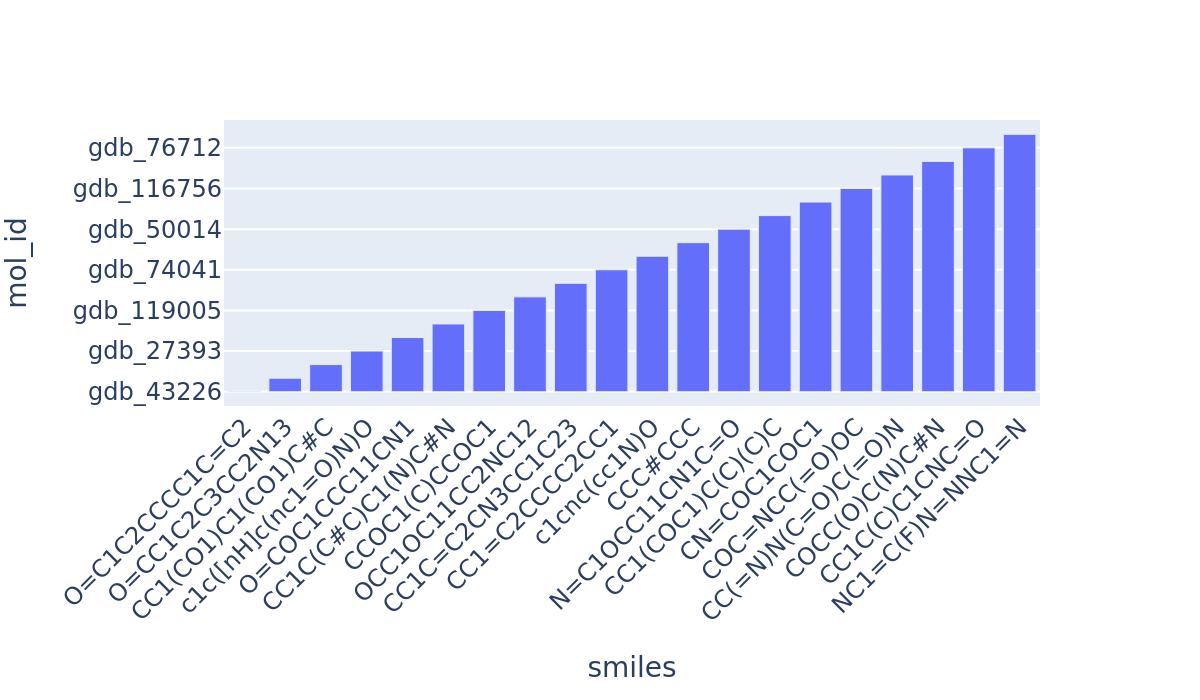

In [139]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go
from plotly.offline import iplot
#plotly.offline.init_notebook_mode(connected=True)
#plotly.offline.init_notebook_mode(connected=True)

# "alpha" - Isotropic polarizability (unit: Bohr^3)
# "gap" - Gap between HOMO and LUMO (unit: Hartree)
#"mol_id" - Molecule ID (gdb9 index) mapping to the .sdf file
#"A" - Rotational constant (unit: GHz)
#"B" - Rotational constant (unit: GHz)
#"C" - Rotational constant (unit: GHz)
#"mu" - Dipole moment (unit: D)
#"alpha" - Isotropic polarizability (unit: Bohr^3)
#"homo" - Highest occupied molecular orbital energy (unit: Hartree)
#"lumo" - Lowest unoccupied molecular orbital energy (unit: Hartree)
#"gap" - Gap between HOMO and LUMO (unit: Hartree)
#"r2" - Electronic spatial extent (unit: Bohr^2)
#"zpve" - Zero point vibrational energy (unit: Hartree)
#"u0" - Internal energy at 0K (unit: Hartree)
#"u298" - Internal energy at 298.15K (unit: Hartree)
#"h298" - Enthalpy at 298.15K (unit: Hartree)
#"g298" - Free energy at 298.15K (unit: Hartree)
#"cv" - Heat capavity at 298.15K (unit: cal/(mol*K))
#"u0_atom" - Atomization energy at 0K (unit: kcal/mol)
#"u298_atom" - Atomization energy at 298.15K (unit: kcal/mol)
#"h298_atom" - Atomization enthalpy at 298.15K (unit: kcal/mol)

fig = px.bar(dataset.head(20), x='smiles', y='mol_id')
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()
data = fig
layout = go.Layout(title= "Gap between HOMO and LUMO vs. Dipole moment", hovermode= 'closest',
                   font = dict(family='Times New Roman',size=12),
                   xaxis= dict(title= '$Gap \: between \: HOMO \: and \: LUMO \: [Hartree]$',zeroline= False, gridwidth= 2),
                   yaxis= dict(title= '$Dipole \: moment \: [D]$',zeroline= False, gridwidth= 2),
                   height = 900,
                   width = 900,
     showlegend= True                
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)
pio.write_image(fig, "./fig_smiles.png", scale=2, width=600, height=350)
#pio.write_image(fig, "gdrive/MyDrive/Colab Notebooks/data/fig_smiles.png", scale=2, width=600, height=350)

#fig.write_image("gdrive/MyDrive/Colab Notebooks/data/fig_smiles.png",dpi=600)
#ax=px.savefig('gdrive/MyDrive/Colab Notebooks/data/fig_smiles.png', dpi=600, facecolor='w', edgecolor='w',orientation='landscape', papertype='a4', format=None, transparent=False, bbox_inches=None, pad_inches=None, frameon=None, metadata=None)
from IPython.display import Image
img_bytes = fig.to_image(format="png", width=600, height=350, scale=1)
Image(img_bytes)

In [84]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

#plotly.offline.init_notebook_mode(connected=True)

# "alpha" - Isotropic polarizability (unit: Bohr^3)
# "gap" - Gap between HOMO and LUMO (unit: Hartree)
#"mol_id" - Molecule ID (gdb9 index) mapping to the .sdf file
#"A" - Rotational constant (unit: GHz)
#"B" - Rotational constant (unit: GHz)
#"C" - Rotational constant (unit: GHz)
#"mu" - Dipole moment (unit: D)
#"alpha" - Isotropic polarizability (unit: Bohr^3)
#"homo" - Highest occupied molecular orbital energy (unit: Hartree)
#"lumo" - Lowest unoccupied molecular orbital energy (unit: Hartree)
#"gap" - Gap between HOMO and LUMO (unit: Hartree)
#"r2" - Electronic spatial extent (unit: Bohr^2)
#"zpve" - Zero point vibrational energy (unit: Hartree)
#"u0" - Internal energy at 0K (unit: Hartree)
#"u298" - Internal energy at 298.15K (unit: Hartree)
#"h298" - Enthalpy at 298.15K (unit: Hartree)
#"g298" - Free energy at 298.15K (unit: Hartree)
#"cv" - Heat capavity at 298.15K (unit: cal/(mol*K))
#"u0_atom" - Atomization energy at 0K (unit: kcal/mol)
#"u298_atom" - Atomization energy at 298.15K (unit: kcal/mol)
#"h298_atom" - Atomization enthalpy at 298.15K (unit: kcal/mol)

df = pd.DataFrame(dataset.head(200))
#Layout design. Can change title, font, x/y-axis etc. Commented out pieces are height and width. 
#For plot in browser I prefer long horizontal plots. For presentations square images may be preferred. 
#Image can be directly saved by hovering over image and clicking camera icon. 
layout_cv_alpha = go.Layout(title= "Heat capavity at 298.15K vs. Isotropic polarizability", hovermode= 'closest',
                   font = dict(family='Times New Roman',size=12),
                   xaxis= dict(title= '$Heat \: capavity \: (cv) \: at \: 298.15K \: [cal/(mol*K)]$',zeroline= False, gridwidth= 2),
                   yaxis= dict(title= '$Isotropic \: polarizability \: (alpha) \: [Bohr^3]$',zeroline= False, gridwidth= 2),
                   height = 600,
                   width = 600,
     showlegend= True                
)
#Scatter plot of collected data. Use df_oxide_all dataframe. df_oxide_all.Density will pull density column.
trace_cv_alpha = go.Scatter(x = df.cv, y = df.alpha, mode = 'markers',
                    marker=dict(size=12, color='black'), name = 'cv alpha')
data_cv_alpha = [trace_cv_alpha]#,trace0,trace2] trace_homo_lumo
fig_cv_alpha = go.Figure(data_cv_alpha, layout_cv_alpha)
iplot(fig_cv_alpha)
pio.write_image(fig_cv_alpha, "./fig_smiles_trace_cv_alpha.png", scale=1, width=600, height=350)
#pio.write_image(fig_IPF, "gdrive/MyDrive/Colab Notebooks/data/fig_smiles_trace.png", scale=2, width=600, height=350)

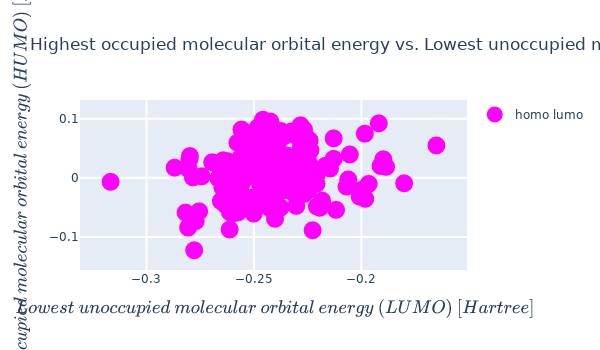

In [85]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

#plotly.offline.init_notebook_mode(connected=True)

from IPython.display import Image
img_bytes = fig_cv_alpha.to_image(format="png", width=600, height=350, scale=1)
Image(img_bytes)

layout_homo_lumo = go.Layout(title= "Highest occupied molecular orbital energy vs. Lowest unoccupied molecular orbital energy", hovermode= 'closest',
                   font = dict(family='Times New Roman',size=12),
                   xaxis= dict(title= '$Lowest \: unoccupied \: molecular \: orbital \: energy \: (LUMO) \: [Hartree]$',zeroline= False, gridwidth= 2),
                   yaxis= dict(title= '$Highest \: occupied \: molecular \: orbital \: energy \: (HUMO) \: [Hartree]$',zeroline= False, gridwidth= 2),
                   height = 600,
                   width = 600,
     showlegend= True                
)
trace_homo_lumo = go.Scatter(x = df.loc[:,'homo'],
                        y = df.loc[:,'lumo'],
                        mode = 'markers', marker=dict(size=18, color='magenta'), text = 'homo lumo', name = 'homo lumo')

data_homo_lumo = [trace_homo_lumo]#,trace0,trace2] trace_homo_lumo
fig_homo_lumo = go.Figure(data_homo_lumo, layout=layout_homo_lumo)
iplot(fig_homo_lumo)
pio.write_image(fig_homo_lumo, "./fig_smiles_trace_homo_lumo.png", scale=1, width=600, height=350)
#pio.write_image(fig_IPF, "gdrive/MyDrive/Colab Notebooks/data/fig_smiles_trace.png", scale=2, width=600, height=350)

from IPython.display import Image
img_bytes = fig_homo_lumo.to_image(format="png", width=600, height=350, scale=1)
Image(img_bytes)

In [54]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

plotly.offline.init_notebook_mode(connected=True)

df = pd.DataFrame(dataset.head(10))

layout_IPF_shear_modulus = go.Layout(title= "Homo vs. Lumo", hovermode= 'closest',
                   font = dict(family='Times New Roman',size=18),
                   xaxis= dict(title= '$Highest \: occupied \: molecular \: orbital \: energy \: [Hartree]$',zeroline= False, gridwidth= 2),
                   yaxis= dict(title= '$Lowest \: unoccupied \: molecular \: orbital \: energy \: [Hartree]$',zeroline= False, gridwidth= 2),
                   height = 600,
                   width = 1200,
     showlegend= False              
)

#Scatter plot of collected data. Use df_oxide_all dataframe. df_oxide_all.Density will pull density column. Could change Density or IPF to Molar Volume or simply volume if you wanted.
trace_all_shear = go.Scatter(x = abs(df.homo), y = df.lumo, mode = 'markers', text = df,
                            marker=dict(size=12, color=(df['gap']),
                                colorbar = dict(title={ 'text': "gap", 
                                                     'font': {'family':'Georgia', 'size': 18}} , 
                                              tickfont={'family':'Georgia', 'size': 16 })))#, name = 'All Queries'))

data_IPF_shear = [trace_all_shear]#,trace0,trace2]
fig_IPF_shear = go.Figure(data_IPF_shear, layout=layout_IPF_shear_modulus)
iplot(fig_IPF_shear)
pio.write_image(fig_IPF, "./fig_smiles_trace_3variable.png", scale=2, width=600, height=350)
#pio.write_image(fig_IPF, "gdrive/MyDrive/Colab Notebooks/data/fig_smiles_trace_3variable.png", scale=2, width=600, height=350)

from IPython.display import Image
Image(img_bytes)
img_bytes = fig_IPF_shear.to_image(format="png", width=600, height=350, scale=2)

In [86]:
import plotly
import plotly.graph_objs as go
from plotly.offline import iplot

plotly.offline.init_notebook_mode(connected=True)

df = pd.DataFrame(dataset.head(10))

layout_IPF_shear_modulus = go.Layout(title= "Mobility vs. Zero Point Vibrational Energy ", hovermode= 'closest',
                   font = dict(family='Times New Roman',size=18),
                   xaxis= dict(title= '$Mobility \: \: [cm2/(V⋅s)]$',zeroline= False, gridwidth= 2),
                   yaxis= dict(title= '$Zero Point Vibrational Energy\: (ZPVE) [GPa]$',zeroline= False, gridwidth= 2),
                   height = 600,
                   width = 1200,
     showlegend= False              
)

#Scatter plot of collected data. Use df_oxide_all dataframe. df_oxide_all.Density will pull density column. Could change Density or IPF to Molar Volume or simply volume if you wanted.
trace_all_shear = go.Scatter(x = abs(df.homo), y = df.lumo, mode = 'markers', text = df,
                            marker=dict(size=12, color=(df['gap']),
                                colorbar = dict(title={ 'text': "gap", 
                                                     'font': {'family':'Georgia', 'size': 18}} , 
                                              tickfont={'family':'Georgia', 'size': 16 })))#, name = 'All Queries'))

data_IPF_shear = [trace_all_shear]#,trace0,trace2]
fig_IPF_shear = go.Figure(data_IPF_shear, layout=layout_IPF_shear_modulus)
iplot(fig_IPF_shear)
pio.write_image(fig_IPF, "./fig_smiles_trace_3variable.png", scale=2, width=600, height=350)
#pio.write_image(fig_IPF, "gdrive/MyDrive/Colab Notebooks/data/fig_smiles_trace_3variable.png", scale=2, width=600, height=350)

from IPython.display import Image
Image(img_bytes)
img_bytes = fig_IPF_shear.to_image(format="png", width=600, height=350, scale=2)

In [87]:
import plotly.express as px
import plotly #This is the library import
import plotly.graph_objs as go # This is the graphical object (Think "plt" in Matplotlib if you have used that before)

from plotly.offline import iplot # These lines are necessary to run Plotly in Jupyter Notebooks, but not in a dedicated environment
plotly.offline.init_notebook_mode(connected=True)


# To create a plot, you need a layout and a trace

# The layout gives Plotly the instructions on the background grids, tiles in the plot, 
# axes names, axes ticks, legends, labels, colors on the figure and general formatting.



layout = go.Layout(title = "Mu vs Smile String", xaxis= dict(title= 'smiles'), yaxis= dict(title= 'mu'))



# The trace contains a type of plot (In this case, Scatter, but it can be "Bars, Lines, Pie Charts", etc.), 
# the data we want to visualize and the way ("Mode") we want to represent it.

df = px.data.iris()
trace = go.scatter(df, x=df.alpha, y =df.mu, mode = 'markers')

# To plot, we create a figure and implement our components in the following way:

data = [trace] # We could include more than just one trace here

fig= go.Figure(data, layout=layout)
iplot(fig)

AttributeError: 'DataFrame' object has no attribute 'alpha'

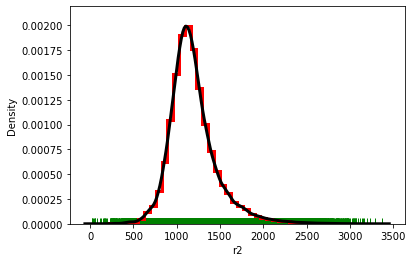

In [62]:
#sns.distplot(dataset["measured log solubility in mols per litre"])

#ax = sns.displot(dataset["mu"], rug=True, rug_kws={"color": "g"},kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "r"})
#ax=plt.savefig('./fig_mu.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)
#ax=plt.savefig('gdrive/MyDrive/Colab Notebooks/data/fig_mu.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)

#ax = sns.displot(dataset["alpha"], rug=True, rug_kws={"color": "g"},kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "r"})
#ax=plt.savefig('./fig_alpha.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)
#ax=plt.savefig('gdrive/MyDrive/Colab Notebooks/data/fig_alpha.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)

#ax = sns.displot(dataset["homo"], rug=True, rug_kws={"color": "g"},kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "r"})
#ax=plt.savefig('./fig_homo.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)
#ax=plt.savefig('gdrive/MyDrive/Colab Notebooks/data/fig_homo.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)

#ax = sns.displot(dataset["lumo"], rug=True, rug_kws={"color": "g"},kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "r"})
#ax=plt.savefig('./fig_lumo.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)
#ax=plt.savefig('gdrive/MyDrive/Colab Notebooks/data/fig_lumo.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)

#ax = sns.displot(dataset["gap"], rug=True, rug_kws={"color": "g"},kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "r"})
#ax=plt.savefig('./fig_gap.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)
#ax=plt.savefig('gdrive/MyDrive/Colab Notebooks/data/fig_gap.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)


#ax = sns.displot(dataset["zpve"], rug=True, rug_kws={"color": "g"},kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "r"})
#ax=plt.savefig('./fig_zpve.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)
#ax=plt.savefig('gdrive/MyDrive/Colab Notebooks/data/fig_zpve.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)

ax = sns.distplot(dataset["r2"], rug=True, rug_kws={"color": "g"},kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "r"})
ax=plt.savefig('./fig_r2.png', dpi=600, facecolor='w', edgecolor='w',orientation='landscape', papertype='a4', format=None, transparent=False, bbox_inches=None, pad_inches=None, frameon=None, metadata=None)
#ax=plt.savefig('gdrive/MyDrive/Colab Notebooks/data/fig_r2.png', dpi=600, facecolor='w', edgecolor='w',orientation='landscape', papertype='a4', format=None, transparent=False, bbox_inches=None, pad_inches=None, frameon=None, metadata=None)

#ax = sns.displot(dataset["cv"], rug=True, rug_kws={"color": "g"},kde_kws={"color": "k", "lw": 3, "label": "KDE"},hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "r"})
#ax=plt.savefig('./fig_cv.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)
#ax=plt.savefig('gdrive/MyDrive/Colab Notebooks/data/fig_cv.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, frameon=None, metadata=None)


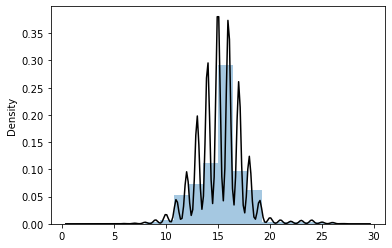

In [140]:
smiles_lengths = map(len, dataset.smiles.values)
#sns.distplot(list(smiles_lengths), bins=20, kde=False)
ax = sns.distplot(list(smiles_lengths), bins=20, kde=True, kde_kws={"color": "k", "label": "KDE"})
ax=plt.savefig('./fig_smiles_lengths.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1,frameon=None, metadata=None)
#ax=plt.savefig('gdrive/MyDrive/Colab Notebooks/data/fig_smiles_lengths.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1,frameon=None, metadata=None)
# ax=plt.savefig('../data/fig_smiles_lengths.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1,frameon=None, metadata=None)


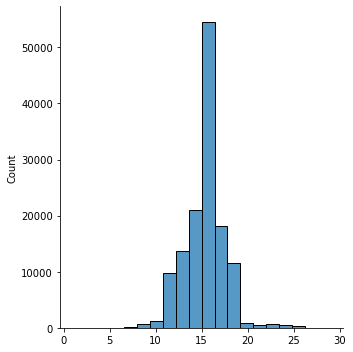

In [63]:
smiles_lengths = map(len, dataset.smiles.values)
#sns.distplot(list(smiles_lengths), bins=20, kde=False)
sns.displot(list(smiles_lengths), bins=20, kde=False)

In [141]:
from typing import List, Optional
import numpy as np

def generate_charset(full_char_list:list) -> list:
    '''
    Assumes full_char_list is a list of characters (e.g., ['c', 'c', '1']).
    Returns a sorted list of unique characters, with index zero as a NULL character, and a PAD character.
    '''
    unique_chars = set(''.join(full_char_list))
    charset = ['NULL', 'PAD'] + sorted(unique_chars)
    return charset

def smiles_to_onehots(smiles_strings:list,
                     unique_charset:list,
                     max_smiles_chars:int) -> np.array:
    one_hots = []
    charset_length = len(unique_charset)

    for smiles_string in smiles_strings:
        one_hot_smiles = np.zeros(shape=(max_smiles_chars, charset_length))
        for i in range(max_smiles_chars):
            one_hot_col = [0]*charset_length
            ind = None # Which index will we flip to be "one-hot"?
            
            if i < len(smiles_string):
                try:
                    ind = unique_charset.index(smiles_string[i])
                    # one_hot_col[unique_charset.index(char)] = 1
                except ValueError:
                    ind = 0 # Treat as NULL if out-of-vocab  
                    # one_hot_col[0] = 1 # Treat as NULL if out-of-vocab   
            else:
                ind = 1 # Add PAD as needed
            
            one_hot_col[ind] = 1
            one_hot_smiles[i,:] = one_hot_col
            
        one_hots.append(one_hot_smiles)
    return np.array(one_hots)

In [142]:
charset = generate_charset(
    dataset["smiles"].values.ravel()
)
# get the number of unique characters
charset_length = len(charset)
# define max number of SMILES for model input vector
max_smiles_chars = 40
# dimension of input vector
input_dim = charset_length * max_smiles_chars
# get one-hot representation of the SMILES strings 
one_hots = smiles_to_onehots(dataset["smiles"].values, charset, max_smiles_chars)
# split input into train and test sets
X_train = one_hots[:-100]
X_test = one_hots[-100:]
# split output to train and test sets
output = dataset["lumo"].values
#output = dataset["homo"].values
#output = dataset["cv"].values
#output = dataset["r2"].values
# "alpha" - Isotropic polarizability (unit: Bohr^3)
# "gap" - Gap between HOMO and LUMO (unit: Hartree)
#"mol_id" - Molecule ID (gdb9 index) mapping to the .sdf file
#"A" - Rotational constant (unit: GHz)
#"B" - Rotational constant (unit: GHz)
#"C" - Rotational constant (unit: GHz)
#"mu" - Dipole moment (unit: D)
#"alpha" - Isotropic polarizability (unit: Bohr^3)
#"homo" - Highest occupied molecular orbital energy (unit: Hartree)
#"lumo" - Lowest unoccupied molecular orbital energy (unit: Hartree)
#"gap" - Gap between HOMO and LUMO (unit: Hartree)
#"r2" - Electronic spatial extent (unit: Bohr^2)
#"zpve" - Zero point vibrational energy (unit: Hartree)
#"u0" - Internal energy at 0K (unit: Hartree)
#"u298" - Internal energy at 298.15K (unit: Hartree)
#"h298" - Enthalpy at 298.15K (unit: Hartree)
#"g298" - Free energy at 298.15K (unit: Hartree)
#"cv" - Heat capavity at 298.15K (unit: cal/(mol*K))
#"u0_atom" - Atomization energy at 0K (unit: kcal/mol)
#"u298_atom" - Atomization energy at 298.15K (unit: kcal/mol)
#"h298_atom" - Atomization enthalpy at 298.15K (unit: kcal/mol)
Y_train = output[:-100]
Y_test = output[-100:]

CC1NC11COCC1C


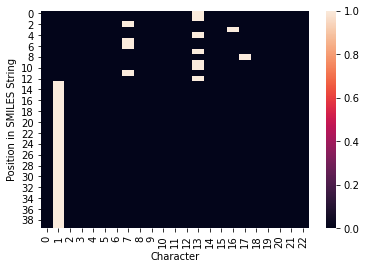

In [144]:
index = 6986
sns.heatmap(X_train[index]) # This is a single training example -- note that it is a matrix, not a single vector!
plt.xlabel('Character')
plt.ylabel('Position in SMILES String')
print(dataset.iloc[index]['smiles'])
#ax=plt.savefig('gdrive/MyDrive/Colab Notebooks/data/fig_smiles_character.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1,frameon=None, metadata=None)
ax=plt.savefig('./fig_smiles_character.png', dpi=600, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1,frameon=None, metadata=None)


# <ins>Supervised CNN model for predicting mobility</ins>

In this section, we will set up a convolutional neural network to predict mobility using one-hot SMILES as input. A convolutional neural network is a machine learning model that is commonly used to classify images.

### Define model structure

First, we will create the model structure, starting with the input layer. As described above, each training example is a 40x31 matrix, which is the shape we pass to the Input layer in Keras.

In [145]:
# Define the input layer
# NOTE: We feed in a sequence here! We're inputting up to max_smiles_chars characters, 
# and each character is an array of length charset_length
smiles_input = Input(shape=(max_smiles_chars, charset_length), name="SMILES-Input")

Next we will define the convolution layers where each layer attempts to learn certain features of the images, such as edges and corners. The input to each layer (a matrix) is transformed via convolution operations, which are element by element multiplications of the input matrix and a filter matrix. The convolutional layer learns the filter matrix that will best identify unique features of the image. You can learn more about convolution operations and the math behind convolutional neural networks [here](https://towardsdatascience.com/gentle-dive-into-math-behind-convolutional-neural-networks-79a07dd44cf9).

In [146]:
# Set parameters for convolutional layers 
num_conv_filters = 16
kernel_size = 3

init_weights = initializers.glorot_normal(seed=0)

# Define the convolutional layers
# Multiple convolutions in a row is a common architecture (but there are many "right" choices here)
conv_1_func = Conv1D(
    filters=num_conv_filters, # What is the "depth" of the convolution? How many times do you look at the same spot?
    kernel_size=kernel_size, # How "wide" of a spot does each filter look at?
    name="Convolution-1",
    activation="relu", # This is a common activation function: Rectified Linear Unit (ReLU)
    kernel_initializer=init_weights #This defines the initial values for the weights
)
conv_2_func = Conv1D(
    filters=num_conv_filters, 
    kernel_size=kernel_size, 
    name="Convolution-2",
    activation="relu",
    kernel_initializer=init_weights
)
conv_3_func = Conv1D(
    filters=num_conv_filters, 
    kernel_size=kernel_size, 
    name="Convolution-3",
    activation="relu",
    kernel_initializer=init_weights
)
conv_4_func = Conv1D(
    filters=num_conv_filters, 
    kernel_size=kernel_size,
    name="Convolution-4",
    activation="relu",
    kernel_initializer=init_weights
)

The four convolution layers defined above will attempt to learn features of the SMILES string (represented as a 40x31 matrix) that are relevant to predicting the mobility. To get a numerical prediction, we now flatten the output of the convolution and pass it to a set of regular `Dense` layers, the last layer predicting one value for the mobility.

In [147]:
# Define layer to flatten convolutions
flatten_func = Flatten(name="Flattened-Convolutions")

# Define the activation function layer
hidden_size = 32
dense_1_func = Dense(hidden_size, activation="relu", name="Fully-Connected", kernel_initializer=init_weights)

# Define output layer -- it's only one dimension since it is regression
output_size = 1
output_mobility_func = Dense(output_size, activation="linear", name="Log-lumo", kernel_initializer=init_weights)

Now that we have defined all the layers, we will connect them together to make a graph:

In [148]:
# connect the CNN graph together
conv_1_fwd = conv_1_func(smiles_input)
conv_2_fwd = conv_2_func(conv_1_fwd)
conv_3_fwd = conv_3_func(conv_2_fwd)
conv_4_fwd = conv_4_func(conv_3_fwd)
flattened_convs = flatten_func(conv_4_fwd)
dense_1_fwd = dense_1_func(flattened_convs)
output_mobility_fwd = output_mobility_func(flattened_convs)

### View model structure and metadata

Now the model is ready to train! But first we will define the model as `mobility_model` and compile it, then view some information on the model using the [keras2ascii](https://github.com/stared/keras-sequential-ascii) tool, which visually represents the layers in our model.

In [149]:
# create model
mobility_model = Model(
            inputs=[smiles_input],
            outputs=[output_mobility_fwd]
)

# compile model
mobility_model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

In [101]:
#!pip install keras_sequential_ascii
from keras_sequential_ascii import keras2ascii
# view model as a graph
keras2ascii(mobility_model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)



IndexError: list index out of range

### Train CNN

Now we will train our CNN mobility model to the training data! During training, we will see metrics printed after each epoch such as test/train loss (both as Mean Squared Error (MSE) and Mean Absolute Error (MAE)).

In [150]:
logdir="mobility_logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

history = mobility_model.fit(
    X_train, # Inputs
    Y_train, # Outputs
    epochs=20, # How many times to pass over the data
    batch_size=64, # How many data rows to compute at once
    verbose=1,
    validation_data=(X_test, Y_test),
    callbacks=[tensorboard_callback] # You would usually use more splits of the data if you plan to tune hyperparams
)

Epoch 1/20
2091/2091 [==============================] - 22s 10ms/step - loss: 4.5108e-04 - mae: 0.0156 - val_loss: 3.6247e-04 - val_mae: 0.0140
Epoch 2/20
2091/2091 [==============================] - 19s 9ms/step - loss: 2.3593e-04 - mae: 0.0117 - val_loss: 2.8877e-04 - val_mae: 0.0126
Epoch 3/20
2091/2091 [==============================] - 18s 9ms/step - loss: 2.0722e-04 - mae: 0.0109 - val_loss: 2.3677e-04 - val_mae: 0.0112
Epoch 4/20
2091/2091 [==============================] - 19s 9ms/step - loss: 1.9053e-04 - mae: 0.0104 - val_loss: 2.6028e-04 - val_mae: 0.0117
Epoch 5/20
2091/2091 [==============================] - 19s 9ms/step - loss: 1.8057e-04 - mae: 0.0101 - val_loss: 2.3664e-04 - val_mae: 0.0111
Epoch 6/20
2091/2091 [==============================] - 19s 9ms/step - loss: 1.7356e-04 - mae: 0.0099 - val_loss: 2.3335e-04 - val_mae: 0.0116
Epoch 7/20
2091/2091 [==============================] - 19s 9ms/step - loss: 1.6913e-04 - mae: 0.0098 - val_loss: 2.2834e-04 - val_mae: 0.011

In [39]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 23152), started 0:02:34 ago. (Use '!kill 23152' to kill it.)

In [41]:
!tensorboard dev upload \ 
  --logdir logs \
  --name "Sample op-level graph" \
  --one_shot 

IndentationError: unexpected indent (<ipython-input-41-5c0f901ef1f8>, line 2)

Let's view the learning curve for the trained model.

This code will generate a plot where we show the test and train errors (MSE) as a function of epoch (one pass of all training examples through the NN).

The learning curve will tell us if the model is overfitting or underfitting.

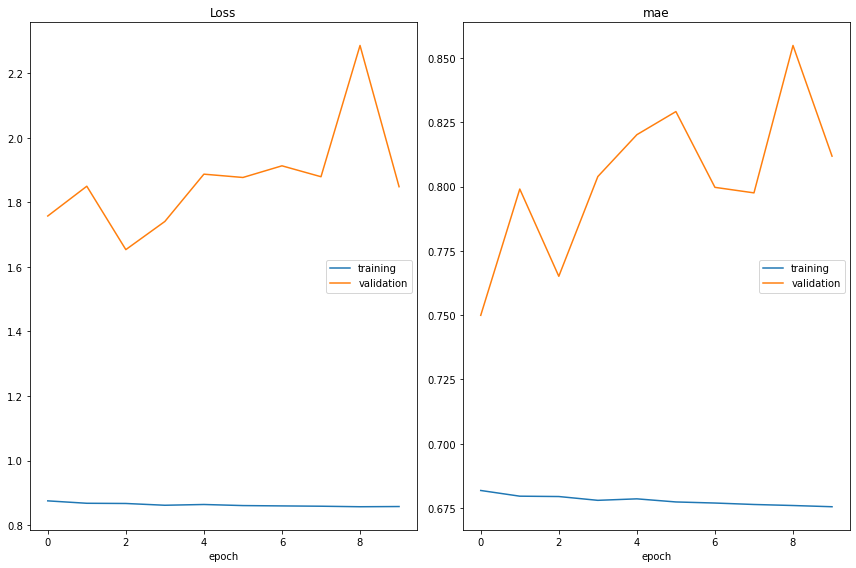

Loss
	training         	 (min:    0.857, max:    0.875, cur:    0.857)
	validation       	 (min:    1.654, max:    2.286, cur:    1.849)
mae
	training         	 (min:    0.676, max:    0.682, cur:    0.676)
	validation       	 (min:    0.750, max:    0.855, cur:    0.812)


In [43]:
!pip install livelossplot --quiet
from livelossplot import PlotLossesKeras
#from livelossplot import PlotLossesKeras, PlotPlossesKerasTF
from livelossplot.inputs.keras import PlotLossesCallback
from livelossplot.inputs.tf_keras import PlotLossesCallback

plotlosses = PlotLossesKeras()
mobility_model.fit(X_train, Y_train,
          epochs=10,
          validation_data=(X_test, Y_test),
          callbacks=[plotlosses],
          verbose=False)

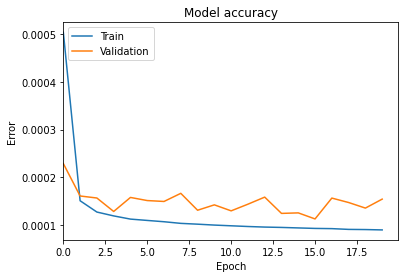

In [104]:
# plot the learning curve 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.xlim(0,)
plt.legend(['Train', 'Validation',], loc='upper left')
plt.show()

### Use CNN to make mobility predictions
Now that we've trained our model, we can use it to make mobility predictions for any SMILES string! We just have to convert the SMILES string to 1-hot representation, then feed it to the `mobility_model` 

In [105]:
example_smiles = [
    'CCCC',
    'CCCCCCCCCCCCCCCCCCCCCC',
    'CCO'
]

for smiles in example_smiles:
    predict_test_input = smiles_to_onehots([smiles], charset, max_smiles_chars)
    mobility_prediction = mobility_model.predict(predict_test_input)[0][0]
    print(f'The predicted log mobility for SMILES {smiles} is {mobility_prediction}')

The predicted log mobility for SMILES CCCC is -0.2519909739494324
The predicted log mobility for SMILES CCCCCCCCCCCCCCCCCCCCCC is -0.2761673927307129
The predicted log mobility for SMILES CCO is -0.24877578020095825


We can now make a parity plot comparing the CNN model predictions to the ground truth data

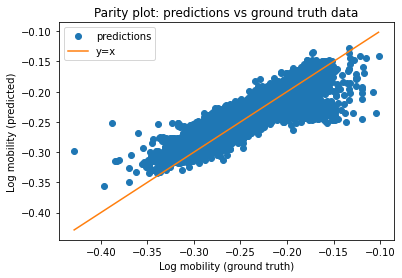

In [106]:
preds = mobility_model.predict(X_train)
x_y_line = np.linspace(min(Y_train.flatten()), max(Y_train.flatten()), 500)
plt.plot(Y_train.flatten(), preds.flatten(), 'o', label='predictions')
plt.plot(x_y_line, x_y_line, label='y=x')
plt.xlabel("Log mobility (ground truth)")
plt.ylabel("Log mobility (predicted)")
plt.title("Parity plot: predictions vs ground truth data")
plt.legend()

### Save model
We can save/load this model for future use, using the `save()` and `load_model()` functions from Keras.

In [107]:
# Save the model
mobility_model.save("mobility_model.hdf5")

# Load it back
loaded_model = load_model("mobility_model.hdf5")

# <ins>VAE model for generating SMILES strings</ins>
In this section, we will set up a variational autoencoder to encode and decode SMILES strings. An autoencoder is a model that encodes the input to the model into a set of variables (known as encoded or 'latent variables'), which are then decoded to recover the original input. A variational autoencoder is an advanced version of an autoencoder where the encoded/latent variables are learnt as probability distributions rather than discrete values. You can learn more about autoencoders and variational autoencoders [here](https://www.jeremyjordan.me/variational-autoencoders/) and [here](https://www.jeremyjordan.me/autoencoders/).

### Define model structure

We'll need to define some new layers for this model, but we can also reuse old ones! (You will see this when we connect the model together.)

In [113]:
def my_mse_loss_b(b):
     def mseb(Y_train, X_train):
         ...
         a = np.ones_like(y_true) #numpy array here is not recommended
         return K.mean(K.square(y_pred - y_true)) + a
     return mseb

In [127]:
# hidden activation layer
hidden_size = 16
dense_1_func = Dense(hidden_size, activation="relu", name="Fully-Connected-Latent", kernel_initializer=init_weights)

Now we'll define the layers to map to the latent space. We then define a sampling function that samples from a gaussian distribution to return the sampled latent variables.

In [128]:
# VAE sampling
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal((batch, dim), mean=0.0, stddev=1.0)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon # mu + sigma*epsilon yields a shifted, rescaled gaussian, 
                                                     # if epsilon is the standard gaussian

# encode to latent space
latent_dim = 32 
z_mean_func = Dense(latent_dim, name='z_mean')
log_z_func = Dense(latent_dim, name='z_log_var')
z_func = Lambda(sampling, name='z_sample')

Now we'll define the RNN (Recurrent Neural Network) layers for decoding SMILES from latent space values. Recurrent neural networks are known to perform well for learning a time series of data, where each cell of the recurrent network can learn from the previous cells, thus learning time dependencies in the data. This RNN uses Gated Recurrent Units as cells and you can learn more about recurrent neural networks and Gated Recurrent Units [here](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be).

In [129]:
# this repeat vector just repeats the input `max_smiles_chars` times 
# so that we get a value for each character of the SMILES string
repeat_1_func = RepeatVector(max_smiles_chars, name="Repeat-Latent-1")

# RNN decoder
rnn_size = 32
gru_1_func = GRU(rnn_size, name="RNN-decoder-1", return_sequences=True, kernel_initializer=init_weights)
gru_2_func = GRU(rnn_size, name="RNN-decoder-2", return_sequences=True, kernel_initializer=init_weights)
gru_3_func = GRU(rnn_size, name="RNN-decoder-3", return_sequences=True, kernel_initializer=init_weights)

Finally we'll define the output, which should map to the original SMILES input:

In [130]:
output_func = TimeDistributed(
    Dense(charset_length, activation="softmax", name="SMILES-Output", kernel_initializer=init_weights), 
    name="Time-Distributed"
)

Now that we have defined all the layers, we will connect them together to make a graph:

In [131]:
# connecting the VAE model as a graph

# cnn encoder layers
conv_1_fwd = conv_1_func(smiles_input)
conv_2_fwd = conv_2_func(conv_1_fwd)
conv_3_fwd = conv_3_func(conv_2_fwd)
conv_4_fwd = conv_4_func(conv_3_fwd)

# flattening
flattened_convs = flatten_func(conv_4_fwd)
dense_1_fwd = dense_1_func(flattened_convs)

# latent space
z_mean = z_mean_func(dense_1_fwd)
z_log_var = log_z_func(dense_1_fwd)
z = z_func([z_mean, z_log_var])

# rnn decoder layers
repeat_1_fwd = repeat_1_func(z)
gru_1_fwd = gru_1_func(repeat_1_fwd)
gru_2_fwd = gru_2_func(gru_1_fwd)
gru_3_fwd = gru_3_func(gru_2_fwd)
smiles_output = output_func(gru_3_fwd)

NotImplementedError: Cannot convert a symbolic Tensor (RNN-decoder-1_2/strided_slice:0) to a numpy array.

### View model structure and metadata
Now the model is ready to train! But first we will compile the VAE model, then view model metadata, again using the [keras2ascii](https://github.com/stared/keras-sequential-ascii) tool. To compile the model, we will need to define our own VAE loss function.

In [ ]:
# vae loss function -- reconstruction loss (cross entropy) plus KL divergence loss against a Gaussian prior
# Intuitive meaning for this loss function: "Reconstruct the data but stay close to a Gaussian"
def vae_loss(x_input, x_predicted):
    reconstruction_loss = K.sum(binary_crossentropy(x_input, x_predicted), axis=-1)
    reconstruction_loss *= input_dim
    kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    return K.mean(reconstruction_loss + kl_loss)

# create model
vae_model = Model(
            inputs=[smiles_input],
            outputs=[smiles_output]
)

# compile model
vae_model.compile(
    optimizer="adam",
    loss=vae_loss,
    metrics=["accuracy"]
)

In [ ]:
# view model as a graph
keras2ascii(vae_model)

### Train VAE

When training our VAE, we will see metrics printed after each epoch such as test/train loss and accuracy values.

In [ ]:
# Reset model and set all layers are trainable
vae_model.reset_states()
for layer in vae_model.layers:
    layer.trainable = True

# fit model to training data
history = vae_model.fit(
    x=X_train,
    y=X_train,
    epochs=20,
    validation_data=(X_test, X_test),
    batch_size=64,
    verbose=1
)

Let's view the learning curve for the trained model. 

This code will generate a plot where we show the test and train errors as a function of epoch (one forward pass and one backward pass of all training examples through the NN).

The learning curve will tell us if the model is overfitting or underfitting. 

In [ ]:
# plot the learning curve 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.xlim(0,)
plt.legend(['Train', 'Validation',], loc='upper left')
plt.show()

### Create a decoder model and use to generate SMILES from noise

Now that we have trained our VAE, we can use the decoding part of the VAE to generate SMILES strings! Let's start by defining our decoder model. Note that this model doesn't need to be compiled since we are not training this model.

In [ ]:
# connect the decoder graph
decoder_input = Input(shape=(latent_dim,), name="decoder_input")
decoder_repeat_1_fwd = repeat_1_func(decoder_input)
decoder_gru_1_fwd = gru_1_func(decoder_repeat_1_fwd)
decoder_gru_2_fwd = gru_2_func(decoder_gru_1_fwd)
decoder_gru_3_fwd = gru_3_func(decoder_gru_2_fwd)
decoder_smiles_output = output_func(decoder_gru_3_fwd)

# define decoder model
decoder_model = Model(
    inputs=[decoder_input],
    outputs=[decoder_smiles_output]
)

In [ ]:
# view decoder graph. this should look like a subset of the VAE graph.
keras2ascii(decoder_model)

Now let's generate SMILES strings! First we will randomly sample from a unit gaussian distribution, feed the random samples into the decoder model, and take the output of the decoder model and convert it back into SMILES characters. Don't be surprised to see strange SMILES strings! We used a very small dataset, and did not train for very long.

In [ ]:
for x in range(10):
    
    # draw from a unit gaussian 
    decoder_test_input = np.random.normal(0, 1, latent_dim).reshape(1, latent_dim)
    decoder_test_output = decoder_model.predict(decoder_test_input)
    
    decoded_one_hots = np.argmax(decoder_test_output, axis = 2)

    SMILES = ''
    for char_idx in decoded_one_hots[0]:
        if charset[char_idx] in ["PAD", "NULL"]: 
            break # Stop decoding if you hit padding or an out-of-vocab character (NULL)
        
        SMILES = SMILES + charset[char_idx]

    print(SMILES)

### Save VAE and decoder models
We can save/load these models for future use, again using the `save()` and `load_model()` functions from Keras.

In [ ]:
# save and load the decoder model 
decoder_model.save("decoder_model.hdf5")
loaded_decoder_model = load_model("decoder_model.hdf5")

# for VAEs, we must instantiate model w/ same architecture then load weights onto this model
vae_model.save_weights("vae.hdf5")
loaded_vae_model = vae_model.load_weights("vae.hdf5")